In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as dt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
breast_cancer_dataset = dt.load_breast_cancer()

In [10]:
df = pd.DataFrame(breast_cancer_dataset.data, columns=breast_cancer_dataset.feature_names)

In [12]:
df['label'] = breast_cancer_dataset.target

In [18]:
print(df.shape)

(569, 31)


In [46]:
features = df.drop(columns=['label'], axis=1)
target = df['label']

In [70]:
features_train, features_test, target_train, target_test = train_test_split(features, target,test_size=0.2, random_state=5)

In [71]:
print(features.shape, features_train.shape, features_test.shape)
print(target.shape, target_train.shape, target_test.shape)

(569, 30) (455, 30) (114, 30)
(569,) (455,) (114,)


In [72]:
scaler = StandardScaler()

In [73]:
features_train_standard = scaler.fit_transform(features_train)

In [82]:
features_test_standard = scaler.transform(features_test)

In [75]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [94]:
#setting up the layers of Neural Network
model = keras.Sequential(
    [
        keras.layers.Input(shape=(30,)),
        keras.layers.Dense(20, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ]
)

In [95]:
# compiling the Neural Network
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [96]:
#training the neural network
history = model.fit(
    features_train_standard,
    target_train,
    validation_split=0.1,
    epochs=10
)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7971 - loss: 0.4827 - val_accuracy: 0.6304 - val_loss: 0.6719
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8973 - loss: 0.3279 - val_accuracy: 0.6957 - val_loss: 0.5119
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9291 - loss: 0.2475 - val_accuracy: 0.7391 - val_loss: 0.4286
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9438 - loss: 0.2030 - val_accuracy: 0.8043 - val_loss: 0.3821
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9584 - loss: 0.1749 - val_accuracy: 0.8478 - val_loss: 0.3531
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9658 - loss: 0.1551 - val_accuracy: 0.8696 - val_loss: 0.3343
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9707 - loss: 0.1397 - val_accuracy: 0.8696 - val_loss: 0.3210
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9731 - loss: 0.1273 - val_accuracy: 0.8696 - val_loss

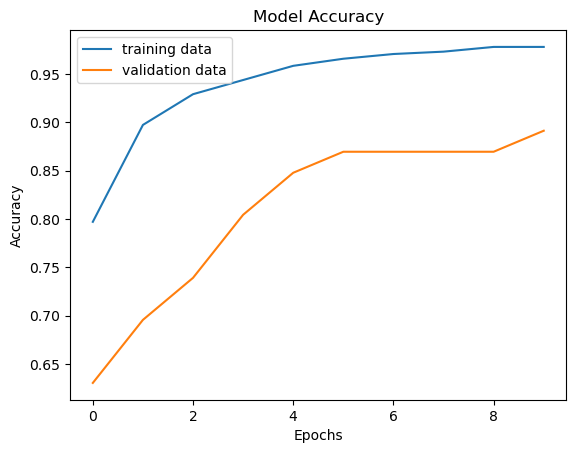

In [97]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(['training data', 'validation data'])

In [98]:
loss, accuracy = model.evaluate(features_test_standard,target_test)
print(accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9386 - loss: 0.1525 
0.9385964870452881


In [99]:
print(features_test_standard.shape)
print(features_test_standard[0])

(114, 30)
[ 0.24330716  1.16982848  0.3218976   0.12331525  0.8361083   0.95344295
  0.73217763  0.78056121  0.32316221  0.23269318  0.00257742 -0.4646027
  0.13441911 -0.04714696 -0.67223431  0.13085075 -0.01140819 -0.29558156
 -0.37330661 -0.4222205   0.64104375  1.56613113  0.9880254   0.4590163
  1.22608852  1.82115175  1.35931652  1.07776416  1.43817149  0.6603927 ]


In [100]:
predict = model.predict(features_test_standard)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [112]:
print(target_test.head())
print(f"{predict[3][0] * 100:.2f}%")

28     0
163    1
123    1
361    1
549    1
Name: label, dtype: int64
97.63%
